# Machine Learning Engineer Nanodegree
## Data Analysis
## Project: Investigate a Dataset

## Getting Started
In this project, we will explore and investigate the dataset related to the survival of passengers on the RMS Titanic as it sank on the morning of April 15, 1912.

## Dataset
**titanic-data.csv** - Given by Udacity

### Variable Description

| survival | Definition | Key |
|---|---|---|
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Sex |  |
| Age | Age in years |  |
| sibsp | # of siblings / spouses aboard the Titanic |  |
| parch | # of parents / children aboard the Titanic |  |
| ticket | Ticket number |  |
| fare | Passenger fare |  |
| cabin | Cabin number |  |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |


## Data Analysis

Titanic Data Set had many samples of the passengers on Titanic, along with the data like whether the passenger survived or not, passenger's gender, age, siblings (or) spouses, parents and children, fare, embarkation port.

With the help of the given dataset, let us analyse the follwing Questions:

**Question 1 : **  Factors made people most likely to survive ?

**Question 2 : **  The survival rate across different gender and How gender affected the survival of people ?

**Question 3 : **  The survival rate across ages and How age affected the survival of people ?

**Question 4 : ** Did passenger class affects passenger survival ?

## Importing Required Packages

In [3]:
# importing different modules to the notebook

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [59]:
# Reading the titanic-data.csv file

titanic_data = pd.read_csv('titanic-data.csv')
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Glances at the Dataset

In [6]:
# Details about the Dataset tables

display(titanic_data.shape)

(891, 12)

In [7]:
# Information about the Dataset

titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
# Get the sum of all null values 

titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Question 1 : Factors made people most likely to survive ?

In [61]:
# Indentifying the factors which most likely to survival

titanic_data.groupby('Survived').describe()

Age                                                       Fare  \
          count       mean        std   min   25%   50%   75%   max  count   
Survived                                                                     
0         424.0  30.626179  14.172110  1.00  21.0  28.0  39.0  74.0  549.0   
1         290.0  28.343690  14.950952  0.42  19.0  28.0  36.0  80.0  342.0   

                    ...  Pclass       SibSp                                \
               mean ...     75%  max  count      mean       std  min  25%   
Survived            ...                                                     
0         22.117887 ...     3.0  3.0  549.0  0.553734  1.288399  0.0  0.0   
1         48.395408 ...     3.0  3.0  342.0  0.473684  0.708688  0.0  0.0   

                         
          50%  75%  max  
Survived                 
0         0.0  1.0  8.0  
1         0.0  1.0  4.0  

[2 rows x 48 columns]

In [57]:
# Understanding a quick overview

titanic_1 = titanic_data.loc[:, ['Survived', 'Pclass', 'Sex', 'Age']]
titanic_1.describe()

,Survived,Pclass,Age
count,891.000000,891.000000,714.000000
mean,0.383838,2.308642,29.699118
std,0.486592,0.836071,14.526497
min,0.000000,1.000000,0.420000
25%,0.000000,2.000000,20.125000
50%,0.000000,3.000000,28.000000
75%,1.000000,3.000000,38.000000
max,1.000000,3.000000,80.000000


** Answer 1: **

* Gender (variable: Sex)
* Age (Variable: Age)
* Passenger Class (Variable: Pclass)

Are the most likely factors for survival.

## Question 2 : The survival rate across different gender and How gender affected the survival of people ?

In [53]:
# Calculating Gender based Survival

# survived_data = titanic_data.loc[titanic_data['Survived'] == 1]

# sex_values = titanic_data['Sex'].value_counts()
# sex_survived_values = survived_data['Sex'].value_counts()
# sex_survived_ratio = sex_survived_values / sex_values

# print sex_survived_ratio
# print ""
# print sex_survived_ratio['female']/sex_survived_ratio['male']

total_passengers = titanic_data['Sex'].value_counts()
survivors = titanic_data.groupby('Sex')['Survived'].sum()
casualties = total - survivors

print ('Total Number of Passengers\n', total_passengers)
print ('\nNumber ofSurvivors\n', survivors)
print ('\nNumber of Casualties\n', casualties)

Total Number of Passengers
 male      577
female    314
Name: Sex, dtype: int64

Number ofSurvivors
 Sex
female    233
male      109
Name: Survived, dtype: int64

Number of Casualties
 female     81
male      468
dtype: int64


In [54]:
total_passengers.sort_values(inplace=True)
print (total_passengers)

female    314
male      577
Name: Sex, dtype: int64


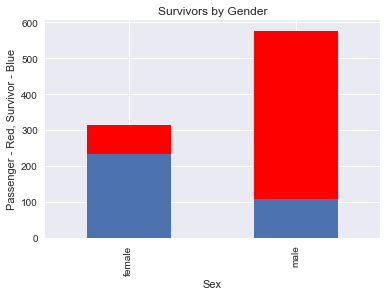

In [55]:
total_passengers.plot(kind='bar', color='r',title = 'Survivors by Gender').set_ylabel('Passenger - Red, Survivor - Blue')
survivors.plot(kind='bar')

In [56]:
# Calculate the Percentages of Male and Female Survived

print ('\nPercent Survived\n',titanic_1.groupby('Sex')['Survived'].sum() / titanic_1['Sex'].value_counts())


Percent Survived
 female    0.742038
male      0.188908
dtype: float64


** Answer 2: **

From the below analysis and visualization. It's clear that Almost 75% of the females were survived, while only 18.9% of the males survived. Hence, females were 3.8 times most likely to **survive compared to males.**

## Question 3 : The survival rate across ages and How age affected the survival of people ?

In [69]:
# Calculating Age based Survival

non_survived_data = titanic_data[titanic_data['Survived']==0]
survived_data = titanic_data[titanic_data['Survived']==1] 

survived_ages = survived_data['Age'].dropna()
print (survived_ages.describe(),'\n')

non_survived_ages = non_survived_data['Age'].dropna()
print (non_survived_ages.describe())

count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64 

count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64


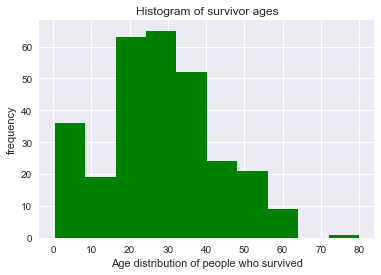

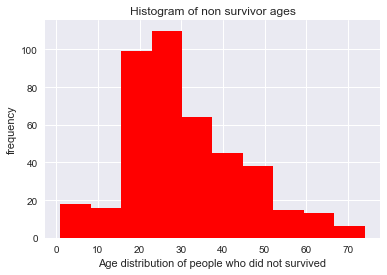

In [70]:
# Histogram of survivors ages

plt.hist(survived_ages,color=['green'])
plt.xlabel('Age distribution of people who survived')
plt.ylabel('frequency')
plt.title('Histogram of survivor ages')
plt.show()

# Histogram of non survivors ages

plt.hist(non_survived_ages,color=['red'])
plt.xlabel('Age distribution of people who did not survived')
plt.ylabel('frequency')
plt.title('Histogram of non survivor ages')
plt.show()

** Answer 3: **
#### From the above analysis and visualization:

##### Histogram of survivor ages
The maximum number of people who surived belongs to the age group of 20 - 30. This distribution follows a normal curve.

##### Histogram of non survivor ages
Simiarly, the maximum number of people who didn't survive belongs to the age group of 20 - 30.

## Question 4 : Did passenger class affects passenger survival ?

In [86]:
# Counting survivors by passenger class

pclass_table = pd.crosstab(titanic_1['Survived'],titanic_1['Pclass'])
print (pclass_table)

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


In [93]:
print (pclass_table.describe())

Pclass          1          2           3
count     2.00000   2.000000    2.000000
mean    108.00000  92.000000  245.500000
std      39.59798   7.071068  178.898016
min      80.00000  87.000000  119.000000
25%      94.00000  89.500000  182.250000
50%     108.00000  92.000000  245.500000
75%     122.00000  94.500000  308.750000
max     136.00000  97.000000  372.000000


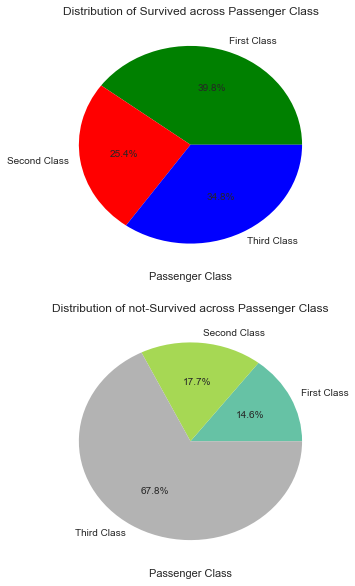

In [110]:
# Calculating Pclass based Survival

f, ax = plt.subplots(2,1, figsize=(5,10))
titanic_1[titanic_1.Survived==1].groupby('Pclass').size().plot.pie(labels=('First Class', 'Second Class', 'Third Class'),colors=('green','red','blue'),autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('Distribution of Survived across Passenger Class')
ax[0].set_xlabel('Passenger Class')
ax[0].set_ylabel('')
titanic_1[titanic_1.Survived==0].groupby("Pclass").size().plot.pie(labels=('First Class', 'Second Class', 'Third Class'),ax=ax[1],autopct='%1.1f%%',cmap='Set2')
ax[1].set_xlabel("Passenger Class")
ax[1].set_ylabel('')
ax[1].set_title("Distribution of not-Survived across Passenger Class")

** Answer 4: **

##### From above analysis and visualization
It's very clear that the lower class had more passengers, than all classes, and more survivors than the middle class.

The lower class had the lowest survival rate.

The Upper Class passengers had the highest survival rate.

## Conclusion:

The results of the above analysis, out of factors(Age, Gender, Pclass), Gender and Pclass were the factors that made a strong impact on the survival. So, the passengers which are more likely to survive as per above analysis are 1st class and female passengers. This analysis is tentative as we have also limitaions to this dataset.